In [31]:
import numpy as np
import math
import matplotlib.pylab as pyplt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [32]:
# RT PIC - classic and nearest neighbour
import underworld as uw
import math
from underworld import function as fn
import glucifer.pylab as plt
import numpy as np
import os
from shapely.geometry import Polygon
from shapely.geometry import Point

In [33]:
dim = 2

meshX = 128
meshY = 64

In [34]:
# create mesh objects
elementMesh = uw.mesh.FeMesh_Cartesian( elementType='Q1/dQ0',  
                                         elementRes=(meshX, meshY), 
                                           minCoord=(-1.,0.), 
                                           maxCoord=(1.,1.))
linearMesh   = elementMesh
constantMesh = elementMesh.subMesh

In [35]:
# create fevariables
velocityField    = uw.fevariable.FeVariable( feMesh=linearMesh,   nodeDofCount=dim )
pressureField    = uw.fevariable.FeVariable( feMesh=constantMesh, nodeDofCount=1 )
temperatureField = uw.fevariable.FeVariable( feMesh=linearMesh,   nodeDofCount=1 )



In [36]:
#Create an arbitrary temperature field

for index, coord in enumerate(linearMesh.data):
    if coord[1] < 0.5:
        temperatureField.data[index] = 0.5
    else:
        t = 1 - coord[1]
        temperatureField.data[index] = t

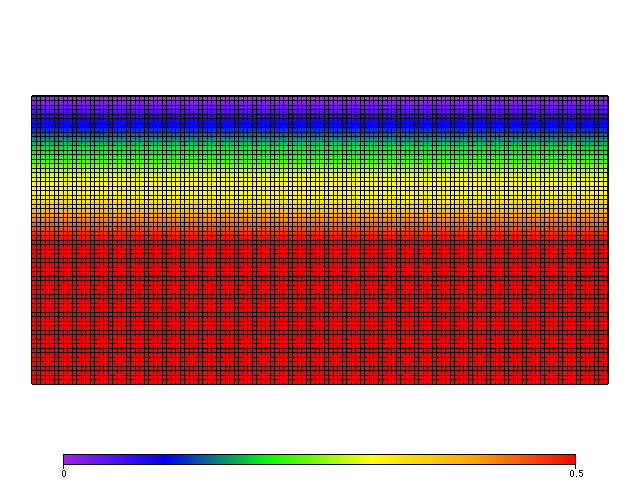

In [37]:
figtemp = plt.Figure()
figtemp.Surface(temperatureField, elementMesh)
figtemp.Mesh(linearMesh, colourBar=False)
figtemp.show()

In [38]:
#########
#create a dictionary that maps from the original regular mesh positions (y positions), to the new spacing, 

original_values = np.unique(linearMesh.data[:,1])
dy0 = 1./linearMesh.elementRes[1]
dyabove = 0.005
numabove = 0.2/dyabove
numbelow = linearMesh.elementRes[1] - numabove
dybelow = 0.8/(numbelow )

new_values1 = np.arange(linearMesh.minCoord[1], 0.8, dybelow) 
new_values2 = np.arange(0.8, linearMesh.maxCoord[1], dyabove)
newys = np.concatenate((new_values1, new_values2))
newys = np.append(newys, 1.)

#linearMesh.elementRes[1] 
#np.add?
newys.shape

d = {}
for i in range(len(original_values)):
    d[original_values[i]] = newys[i]

In [41]:
#Walk mesh nodes and use dictionary to lookup new Y positions
with linearMesh.deform_mesh():
    for index, coord in enumerate(linearMesh.data):
        y0 = coord[1]
        yn = d[y0]
        linearMesh.data[index][1] = yn

* if you move the nodes, you move the data associated with them

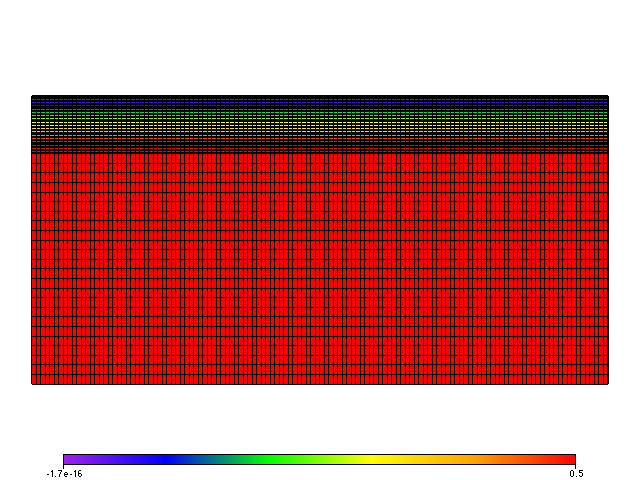

In [42]:
figtemp2 = plt.Figure()
figtemp2.Surface(temperatureField, elementMesh)
figtemp2.Mesh(linearMesh, colourBar=False)
figtemp2.show()

In [11]:
indexField = uw.fevariable.FeVariable( feMesh=linearMesh, nodeDofCount=1)

for index, coord in enumerate(linearMesh.data):
    indexField.data[index] = index

In [29]:
#Create an arbitrary temperature field

for index, coord in enumerate(linearMesh.data):
    if coord[1] < 0.5:
        temperatureField.data[index] = 0.5
    else:
        t = 1 - coord[1]
        temperatureField.data[index] = t

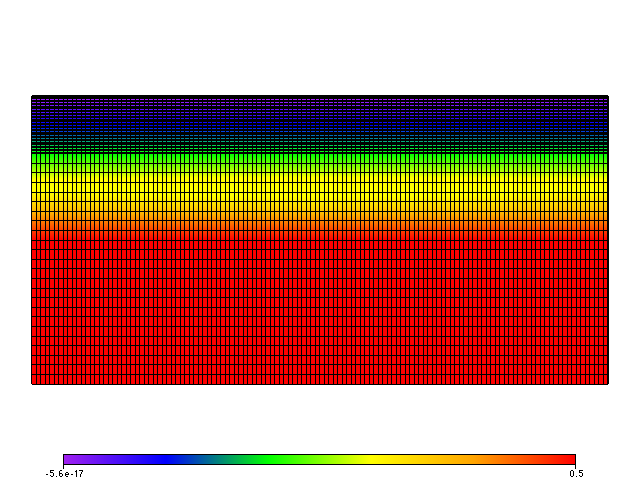

In [30]:
figtemp2 = plt.Figure()
figtemp2.Surface(temperatureField, elementMesh)
figtemp2.Mesh(linearMesh, colourBar=False)
figtemp2.show()

In [30]:
#T = []
#for depth in np.linspace(0,1,1000):
#    T.append(temperatureField.evaluate((0.5, depth))[0][0])
#temperatureField.evaluate((0.5, 0.7))

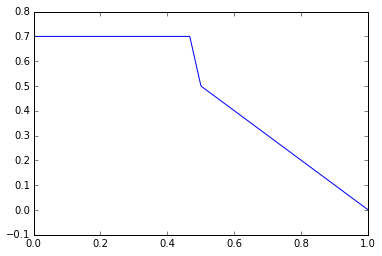

In [31]:
#pyplt.plot(np.linspace(0,1,1000), T)

<matplotlib.colorbar.Colorbar instance at 0x10cd70200>

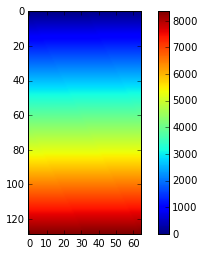

In [22]:
#pyplt.imshow(indexField.data.reshape(meshX+1, meshY +1))
#pyplt.colorbar()